In [663]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set_theme(style="white")

In [664]:
df = pd.read_csv('BigmacPrice.csv')
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].apply(lambda x: x.strftime("%Y-%m"))
df.head()

,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2000-04,ARS,Argentina,2.50,1,2.50
1,2000-04,AUD,Australia,2.59,1,2.59
2,2000-04,BRL,Brazil,2.95,1,2.95
3,2000-04,GBP,Britain,1.90,1,1.90
4,2000-04,CAD,Canada,2.85,1,2.85


In [665]:
df.describe()

,local_price,dollar_ex,dollar_price
count,1.946000e+03,1.946000e+03,1946.000000
mean,1.581609e+04,4.722255e+03,3.568011
std,3.940050e+05,1.006232e+05,1.417054
min,0.000000e+00,1.000000e+00,0.000000
25%,4.450000e+00,1.000000e+00,2.572500
50%,1.500000e+01,5.000000e+00,3.400000
75%,8.700000e+01,3.200000e+01,4.240000
max,1.602000e+07,3.613989e+06,11.250000


In [666]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1946 non-null   object 
 1   currency_code  1946 non-null   object 
 2   name           1946 non-null   object 
 3   local_price    1946 non-null   float64
 4   dollar_ex      1946 non-null   int64  
 5   dollar_price   1946 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 91.3+ KB


In [667]:
pln_usd_df = pd.read_csv('usdpln_m.csv')
pln_usd_df['Date'] = pd.to_datetime(pln_usd_df['Date'])
pln_usd_df['Date'] = pln_usd_df['Date'].apply(lambda x: x.strftime("%Y-%m"))
pln_usd_df.drop(['Close', 'High', 'Low'], axis=1, inplace=True)

In [668]:
pln_usd_df.rename(columns={'Date':'date', 'Open':'dollar_ex'}, inplace=True)
pln_usd_df.head()

,date,dollar_ex
0,2000-03,4.160
1,2000-04,4.127
2,2000-05,4.465
3,2000-06,4.375
4,2000-07,4.360


In [669]:
poland_data = df[df['name'] == 'Poland']

In [670]:
poland_data.columns
poland_data = pd.merge(poland_data, pln_usd_df, how='inner', on= 'date')
poland_data.drop('dollar_ex_x', axis=1, inplace=True)

In [671]:
poland_data.rename(columns={'dollar_ex_y':'dollar_ex'}, inplace=True)
poland_data['dollar_price'] = poland_data['local_price'] / poland_data['dollar_ex']
poland_data.head()

,date,currency_code,name,local_price,dollar_price,dollar_ex
0,2000-04,PLN,Poland,5.5,1.332687,4.1270
1,2001-04,PLN,Poland,5.9,1.442931,4.0889
2,2002-04,PLN,Poland,5.9,1.432630,4.1183
3,2003-04,PLN,Poland,6.3,1.533593,4.1080
4,2004-05,PLN,Poland,6.3,1.563275,4.0300


In [672]:

poland_data = pd.concat([poland_data, df[df['name'] == 'United States']])
poland_data['date'] = pd.to_datetime(poland_data['date'])

poland_data.reset_index(inplace=True)
poland_data.drop('index', axis=1, inplace=True)

In [673]:
poland_data

,date,currency_code,name,local_price,dollar_price,dollar_ex
0,2000-04-01,PLN,Poland,5.50,1.332687,4.1270
1,2001-04-01,PLN,Poland,5.90,1.442931,4.0889
2,2002-04-01,PLN,Poland,5.90,1.432630,4.1183
3,2003-04-01,PLN,Poland,6.30,1.533593,4.1080
4,2004-05-01,PLN,Poland,6.30,1.563275,4.0300
...,...,...,...,...,...,...
69,2020-07-01,USD,United States,4.82,4.820000,1.0000
70,2021-01-01,USD,United States,4.89,4.890000,1.0000
71,2021-07-01,USD,United States,4.93,4.930000,1.0000
72,2022-01-01,USD,United States,5.04,5.040000,1.0000


In [674]:
poland_data["dollar_price"] = poland_data["dollar_price"].apply(lambda x: float(x))

In [675]:
poland_data['mark'] = poland_data["date"]
for i in range(37):
    poland_data['mark'].iloc[i] = f'{poland_data["date"].iloc[i].strftime("%Y-%m")}\nBig Mac price: {poland_data["local_price"].iloc[i]} PLN\nEquivalent in USD: {poland_data["dollar_price"].iloc[i]:.2f} $\nUSD to PLN: {poland_data["dollar_ex"].iloc[i]:.2f}'
for j in range(37, 74):
    poland_data['mark'].iloc[j] = f'{poland_data["date"].iloc[j].strftime("%Y-%m")}\nBig Mac price: {poland_data["local_price"].iloc[j]} $'
    



C:\Users\adamj\AppData\Local\Temp\ipykernel_139236\1042082069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poland_data['mark'].iloc[i] = f'{poland_data["date"].iloc[i].strftime("%Y-%m")}\nBig Mac price: {poland_data["local_price"].iloc[i]} PLN\nEquivalent in USD: {poland_data["dollar_price"].iloc[i]:.2f} $\nUSD to PLN: {poland_data["dollar_ex"].iloc[i]:.2f}'
C:\Users\adamj\AppData\Local\Temp\ipykernel_139236\1042082069.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poland_data['mark'].iloc[j] = f'{poland_data["date"].iloc[j].strftime("%Y-%m")}\nBig Mac price: {poland_data["local_price"].iloc[j]} $'


In [676]:

poland_data.head()

,date,currency_code,name,local_price,dollar_price,dollar_ex,mark
0,2000-04-01,PLN,Poland,5.5,1.332687,4.1270,2000-04\nBig Mac price: 5.5 PLN\nEquivalent in...
1,2001-04-01,PLN,Poland,5.9,1.442931,4.0889,2001-04\nBig Mac price: 5.9 PLN\nEquivalent in...
2,2002-04-01,PLN,Poland,5.9,1.432630,4.1183,2002-04\nBig Mac price: 5.9 PLN\nEquivalent in...
3,2003-04-01,PLN,Poland,6.3,1.533593,4.1080,2003-04\nBig Mac price: 6.3 PLN\nEquivalent in...
4,2004-05-01,PLN,Poland,6.3,1.563275,4.0300,2004-05\nBig Mac price: 6.3 PLN\nEquivalent in...


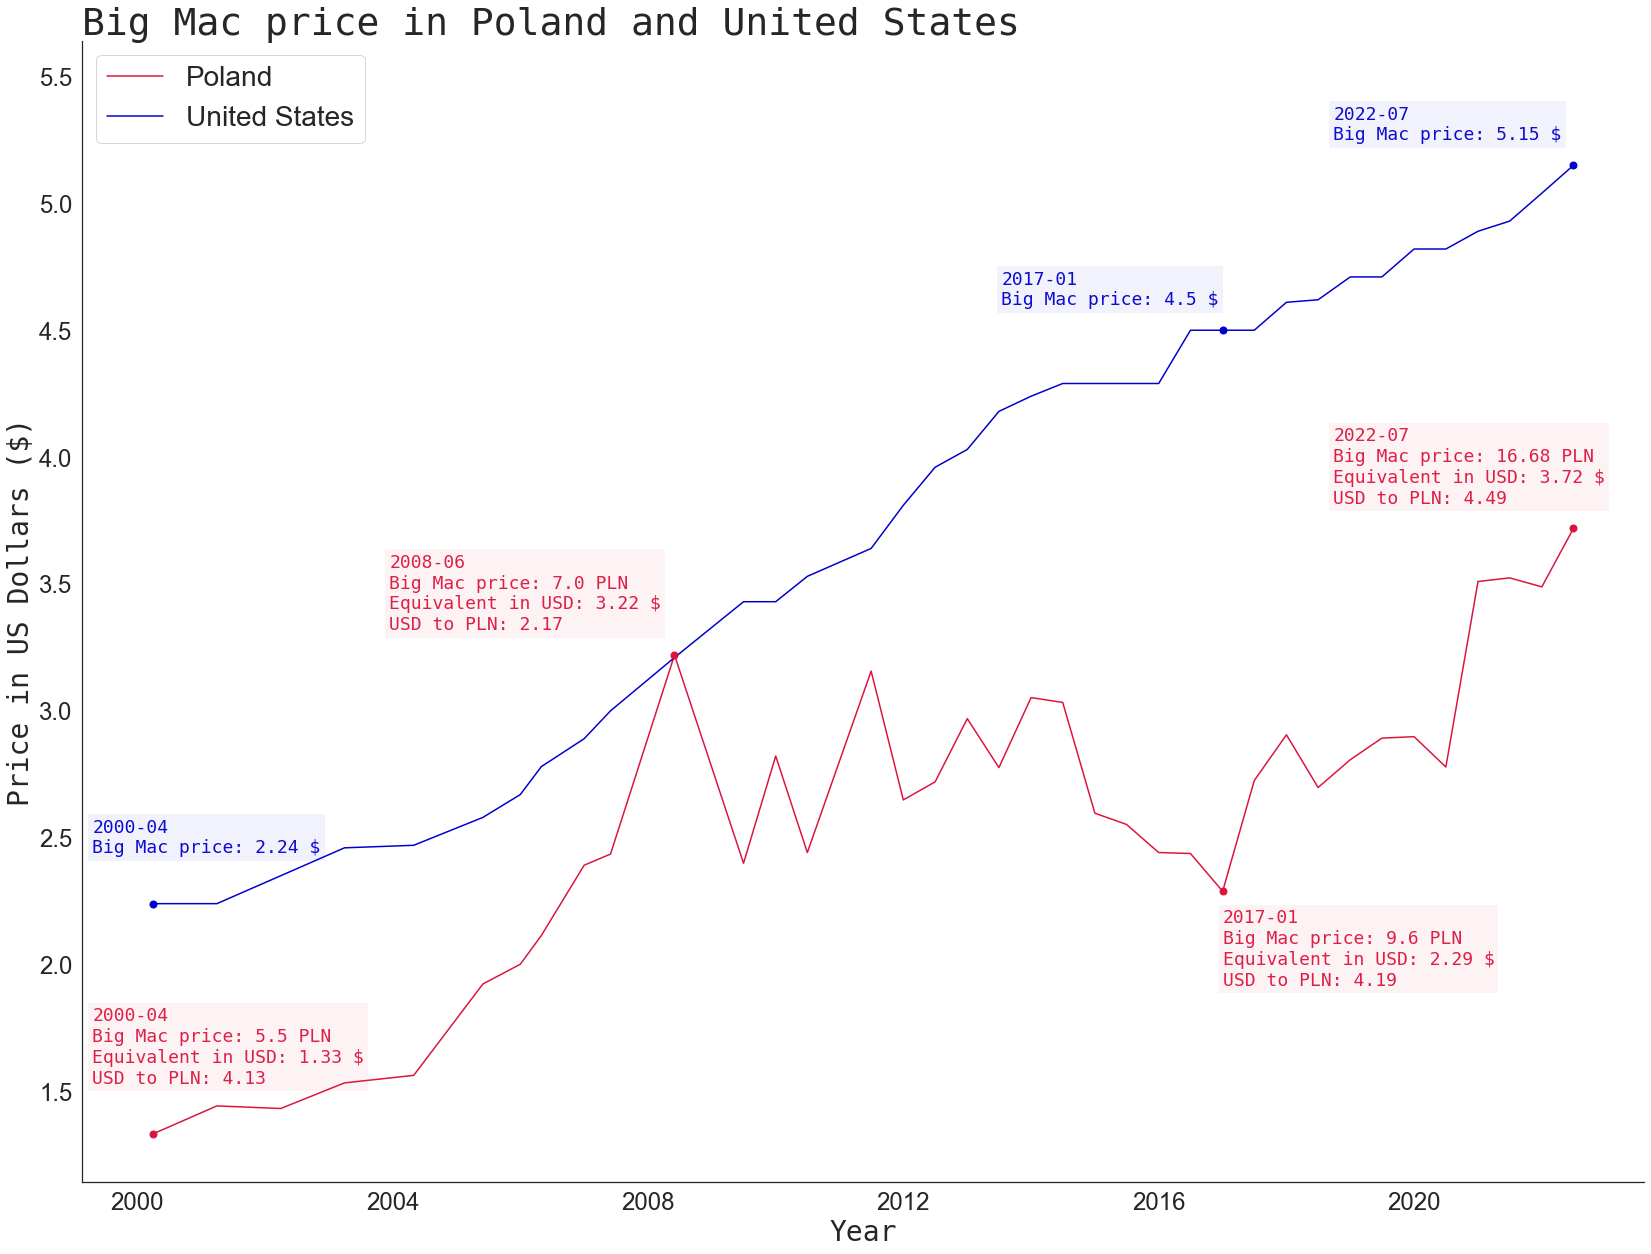

In [682]:

font = {'family': 'monospace',
        'weight': 'normal',
        'size': 18,
        }
plt.figure(figsize=(28, 21))
sns.lineplot(x="date", y="dollar_price",data=poland_data, hue='name', markers=True, dashes=False, palette=palette)
plt.xlim(plt.xlim()[0], plt.xlim()[1])
plt.ylim(plt.ylim()[0], plt.ylim()[1]+0.3)
plt.legend(loc='upper left', prop={'size': 28})
plt.title("Big Mac price in Poland and United States", size=38, loc="left", family="monospace", linespacing=0.7)
plt.ylabel("Price in US Dollars ($)", size=28, family="monospace", linespacing=0.7)
plt.xlabel("Year", size=28, family="monospace", linespacing=0.7)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

palette=["crimson", "mediumblue"]
for ind, item, color in zip(range(2), poland_data.groupby('name'),palette):
    i = 0
    for x,y,m in item[1][['date','dollar_price','mark']].values:
        i += 1
#         print(x,y,m)
        if i in [1, 26, 37]:
            plt.plot(x, y, marker='o', markersize=7, color = color)
            if i == 26:
                if ind == 0:
                    t = plt.text(x,y-0.37,m,color=color, fontdict=font, alpha=0.95)
                    t.set_bbox(dict(facecolor=color, alpha=0.05, linewidth=0))
                else:
                    t = plt.text(15900,y+0.1,m,color=color, fontdict=font, alpha=0.95)
                    t.set_bbox(dict(facecolor=color, alpha=0.05, linewidth=0))
            else:
                if i == 37:
                    t = plt.text(17800,y+0.1,m,color=color, fontdict=font, alpha=0.95)
                    t.set_bbox(dict(facecolor=color, alpha=0.05, linewidth=0))
                else:
                    t = plt.text(10700,y+0.2,m,color=color, fontdict=font, alpha=0.95)
                    t.set_bbox(dict(facecolor=color, alpha=0.05, linewidth=0))
        if i == 11:
            if ind==0:
                plt.plot(x, y, marker='o', markersize=7, color = color)
                t = plt.text(12400,y+0.1,m,color=color, fontdict=font, alpha=0.95)
            t.set_bbox(dict(facecolor=color, alpha=0.05, linewidth=0))
sns.despine()

plt.savefig('price_comparison.png')
plt.show()